# Exploratory Analysis: Home Credit Default Risk from Kaggle 

This notebook is provided to get a good first understanding of the data within the application_train and application_test set, which is mainly used for the model. It is aimed to get a first grasp by going through the data starting with the common functions describe() and head() followed by various inspections of missing values, outliers and correlations. With the help of visualizations the data properties should become more understandable.

For the sake of simplicity, all the steps, which were coded within a notebook like preprocessing or model building, were excluded. These functions can now be found in the corresponding script files. 

## Loading the data

In [4]:
import src.data.load as load
import pandas as pd
load.load_dataset('../data/raw/')
application_train_df = pd.read_csv("../data/raw/application_train.csv")
application_test_df = pd.read_csv("../data/raw/application_test.csv")


Data is already in directory


## Getting a overview of the loaded dataframes



In [3]:
print("Shape of training set:", application_train_df.shape)
print("Shape of test set:", application_test_df.shape)

Shape of training set: (307511, 122)
Shape of test set: (48744, 121)


Applying the set_option functions to display the whole dataframe

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
application_train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

Scrolling horizontally through the describe table an abnormality can be noticed.
The DAYS_EMPLOYED column does specify the days of employment from the day of application with a negative count. Still there is a MAX value of 365243. This needs to be inspected in the further research. 

In [5]:
application_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

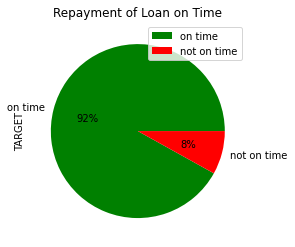

In [6]:
import matplotlib.pyplot as plt

application_train_df.TARGET.value_counts().plot(kind='pie', autopct='%1.0f%%', colors = ['green','red'], labels = ["on time", "not on time"])
plt.title("Repayment of Loan on Time")
plt.legend()

Text(0.5, 1.0, 'Distribution of target value')

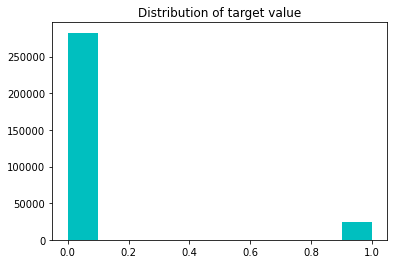

In [7]:
colors=['green', 'red']
plt.hist(application_train_df.TARGET, color = 'c')
plt.title("Distribution of target value")

## Inspecting Missing Values

These charts are used to visualize how balanced the data is and how it is distributed. Since it is a 92% to 8% distribution this can be classified as a disbalanced set. 

In [8]:
missing_values = application_train_df.isnull().sum().sort_values(ascending = False)
missing_values

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

There are significantly high numbers of missing values, which will be display in the following chart. 

Text(0.5, 1.0, 'Number of missing values')

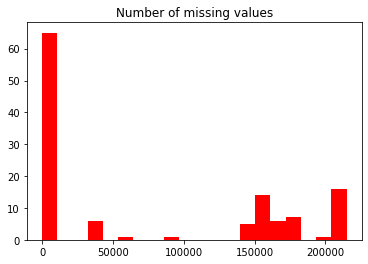

In [9]:
plt.hist(missing_values, bins = 20, color = 'r')
plt.title("Number of missing values")

Since there are a lot of missing values, this needs to be fixed before building the model. This will be done by a common imputer provided by the sci-kit learn package. 

## Researching for the encoding of categorical features

In [10]:
application_train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
application_train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_TYPE_SUITE                7
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_REALTY                2
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
dtype: int64

There are a total of 16 columns, which needs to be transformed by a Label or One hot encoder before building the models. 

## Outliers & Faulty Values

In [12]:
application_train_df.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

Since the number of unique elements for the gender code provided the result 3, a further inspection revealed a faulty value, which then needs to be fixed before the modelbuilding. 

In [13]:
application_train_df.DAYS_EMPLOYED.describe()


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [14]:
365243 / 365

1000.6657534246575

In [15]:
unusual_employment = len(application_train_df[application_train_df['DAYS_EMPLOYED'] == 365243])
print("%d rows have a unusual number of days for employment" % unusual_employment)
print("Total Rows are : ", len(application_train_df))
print("Makes a total ratio of ", unusual_employment/ len(application_train_df))


55374 rows have a unusual number of days for employment
Total Rows are :  307511
Makes a total ratio of  0.18007160719453938


Text(0.5, 1.0, 'Employment Days with faulty values')

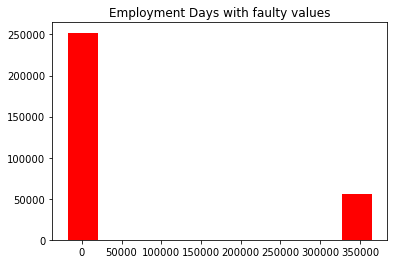

In [16]:
plt.hist(application_train_df['DAYS_EMPLOYED'], color = 'r')
plt.title("Employment Days with faulty values")

The max value of 365243, which would stand for a 1000 years is obviously a fault and has to be replaced. Afterwards we have to again check the values for distribution and if there are other values, which are outliers or false, because as mentioned above this column does count the days in a negative manner, so positive values would of course be an error. 

In [17]:
application_train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Employment Days without faulty values')

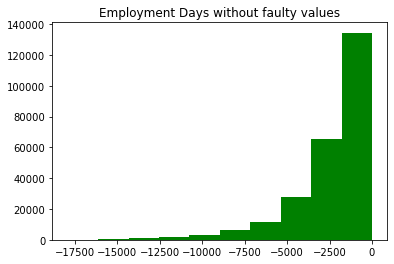

In [18]:
plt.hist(application_train_df['DAYS_EMPLOYED'], color = 'g')
plt.title("Employment Days without faulty values")

In [19]:
application_train_df.DAYS_EMPLOYED.describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

After plotting and using the describe function we see, that it now is in a manner, which is acceptable and doesn't seem unusual. 
An oppurtunity would be to add another feature column which a flag for the rows, where this error value was replaced, but for keeping the simplicity, it won't be applied to this case. 

Since we manipulated the train set we now have to do the same manipulations with the test set. 

In [20]:
application_test_df.DAYS_EMPLOYED.describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

9274 rows have a unusual number of days for employment
Total Rows are :  48744
Makes a total ratio of  0.1902593139668472


Text(0.5, 1.0, 'Employment Days with faulty values in test set')

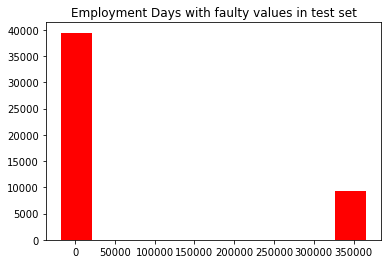

In [21]:
unusual_employment_test = len(application_test_df[application_test_df['DAYS_EMPLOYED'] == 365243])
print("%d rows have a unusual number of days for employment" % unusual_employment_test)
print("Total Rows are : ", len(application_test_df))
print("Makes a total ratio of ", unusual_employment_test/ len(application_test_df))

plt.hist(application_test_df['DAYS_EMPLOYED'], color = 'r')
plt.title("Employment Days with faulty values in test set")

In [22]:
application_test_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

Text(0.5, 1.0, 'Employment Days without faulty values in test set')

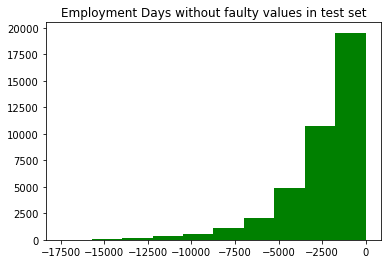

In [23]:
plt.hist(application_test_df['DAYS_EMPLOYED'], color = 'g')
plt.title("Employment Days without faulty values in test set")

In [24]:
application_test_df.DAYS_EMPLOYED.describe()

count    39470.000000
mean     -2476.738941
std       2307.963913
min     -17463.000000
25%      -3328.750000
50%      -1765.000000
75%       -861.000000
max         -1.000000
Name: DAYS_EMPLOYED, dtype: float64

## Correlations

In [25]:
correlations = application_train_df.corr()['TARGET'].sort_values()
print(correlations.head(15), correlations.tail(15))

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
FLOORSMIN_MODE               -0.032698
Name: TARGET, dtype: float64 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE    

In [35]:
application_train_df['DAYS_BIRTH'] = abs(application_train_df['DAYS_BIRTH'])
application_train_df['DAYS_EMPLOYED'] = abs(application_train_df['DAYS_EMPLOYED'])
focus_features = application_train_df[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED']]
focus_features_correlation = focus_features.corr()
focus_features_correlation

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239,-0.074958
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610,0.252712
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996,0.093444
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478,0.129722
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000,0.352321
DAYS_EMPLOYED,-0.074958,0.252712,0.093444,0.129722,0.352321,1.000000


Text(0.5, 1.0, 'Correlation between the 5 picked high correlating features')

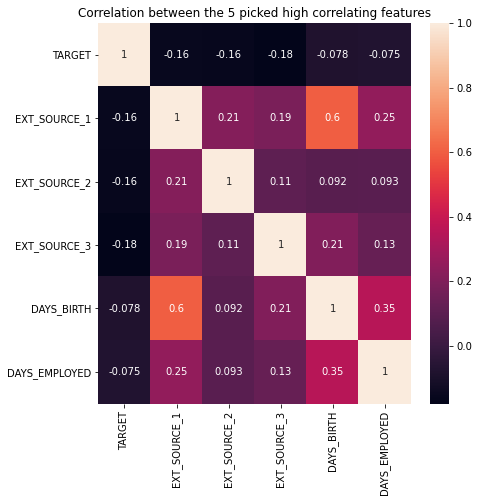

In [33]:
plt.figure(figsize=(7,7))
sns.heatmap(focus_features_correlation, annot= True)
plt.title("Correlation between the 5 picked high correlating features")


Besides the high correlations in nearly black colour, which were identified in the listing above, it is striking that there is also a connection between Days_birth and Ext_source 1. So it can be that this external source considers the date of birth of applicants within its classification. Obviously there is also a correlation between age and days of employment. 

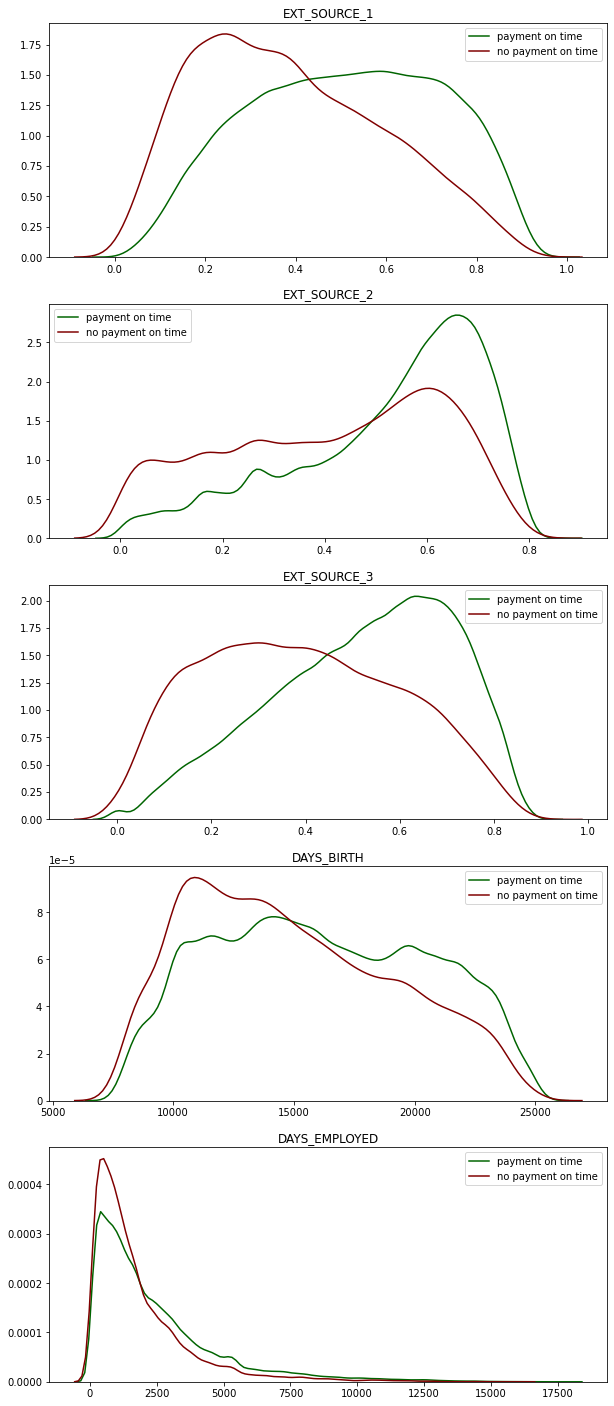

In [34]:
plt.figure(figsize=(10,25))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED']):
    plt.subplot(5,1,i+1)
    sns.kdeplot(application_train_df.loc[application_train_df['TARGET'] == 0, source], label = "payment on time", color='darkgreen')
    sns.kdeplot(application_train_df.loc[application_train_df['TARGET'] == 1, source], label = "no payment on time", color ='maroon')
    plt.title(source)

The three Ext_sources are well separated, that's why they it seem that they are important features. IN the Days_birth feature there is also a clear tendency of high risk of no payment on time for younger applicants and decresing through an increase in age.